In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df = pd.read_csv('knn.csv')
df

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight
5,82,170,Overweight
6,65,172,Normal
7,58,180,Underweight
8,68,162,Overweight
9,63,165,Normal


In [2]:
print("data shape : ", df.shape)

data shape :  (25, 3)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Weight(x2)  25 non-null     int64 
 1   Height(y2)  25 non-null     int64 
 2   Class       25 non-null     object
dtypes: int64(2), object(1)
memory usage: 732.0+ bytes


In [4]:
df.describe()

,Weight(x2),Height(y2)
count,25.00000,25.000000
mean,64.44000,172.480000
std,9.62237,6.532738
min,50.00000,162.000000
25%,57.00000,168.000000
50%,65.00000,173.000000
75%,72.00000,178.000000
max,82.00000,183.000000


In [5]:
df.Class.value_counts()

Class
Normal         10
Underweight     8
Overweight      7
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

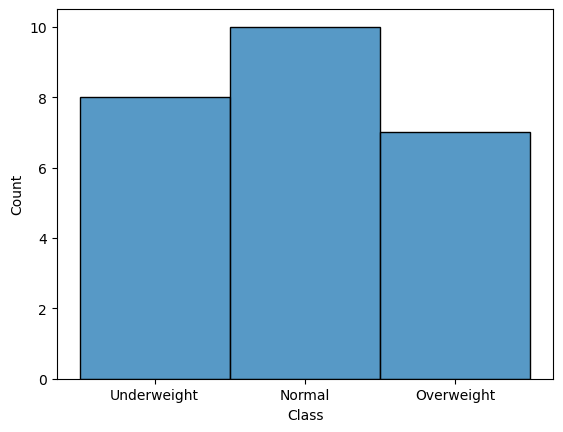

In [6]:
sns.histplot(df['Class'])

In [7]:
df.isnull().sum()

Weight(x2)    0
Height(y2)    0
Class         0
dtype: int64

In [8]:
df.duplicated().sum()

0

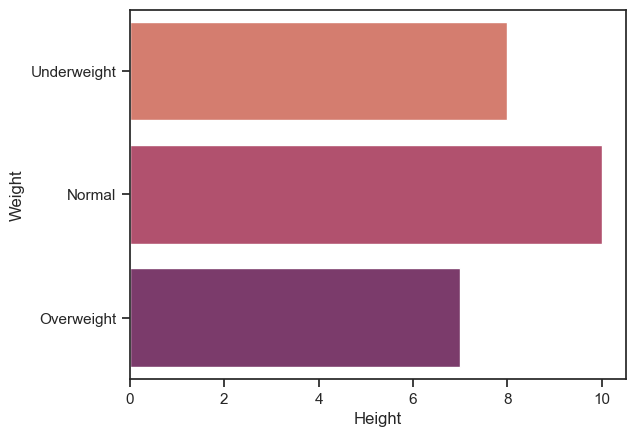

In [9]:
sns.set_theme(style='ticks')
sns.countplot(y='Class', data=df, palette='flare')
plt.ylabel("Weight")
plt.xlabel('Height')
plt.show()

In [10]:
df.head()

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Class'] = label_encoder.fit_transform(df['Class'])


In [12]:
df.head()

,Weight(x2),Height(y2),Class
0,51,167,2
1,66,177,0
2,75,169,1
3,69,176,0
4,50,173,2


In [13]:
x = df.drop(columns = ['Class'])
y = df['Class']

print("x : ", x.shape)
print("y : ", y.shape)

x :  (25, 2)
y :  (25,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (20, 2)
y_train : (20,)
x_test : (5, 2)
y_test : (5,)


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         1

    accuracy                           0.40         5
   macro avg       0.28      0.50      0.36         5
weighted avg       0.23      0.40      0.29         5

Akurasi KNN : 40.00%


C:\Users\M TAUFIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M TAUFIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M TAUFIK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
testing = {'Weight(x2)': [51], 'Height(y2)' : [168]
          }

testing = pd.DataFrame(testing)
testing

,Weight(x2),Height(y2)
0,51,168


In [18]:
pred_coba = knn.predict(testing)
print("rata rata klasifikasi berat badan di satu kelas")
print(pred_coba)

rata rata klasifikasi berat badan di satu kelas
[2]
